In [104]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
import datetime as dt
import sys
from datetime import datetime as dt

In [5]:
d = pd.read_pickle('/localscratch/data/project_one/data/predictions/predictions_scan.p')

print d[['Labels','Score','Duration']].head(10)

    Labels     Score Duration
0   ALV.DE  0.398148        3
1   ADS.DE  0.379630        3
2   ALV.DE  0.400169        3
3   ALV.DE  0.395238        3
4   ALV.DE  0.401852        3
5   ALV.DE  0.414815        3
6   BAS.DE  0.377778        3
7  BAYN.DE  0.331481        3
8   BEI.DE  0.416667        3
9   BMW.DE  0.333333        3


        Labels LastTrainingsDate PredictionDay ValidationDay  \
10359  BOSS.DE        2018-03-05    2018-03-08    2018-03-13   
10360  BOSS.DE        2018-03-06    2018-03-09    2018-03-14   

       PrizeAtPrediction  PrizeAtValidation  RelativePrizeChange  \
10359              67.70              70.52                 4.17   
10360              67.42                NaN                  NaN   

       TrueCategory PredictedCategory  \
10359            10                 7   
10360            11                 7   

                                  PredictedProbabilities  PredictedUpperPrize  \
10359  [3.0, 3.0, 2.0, 6.0, 7.0, 9.0, 16.0, 24.0, 17....                69.05   
10360  [3.0, 1.0, 2.0, 7.0, 7.0, 1.0, 19.0, 26.0, 20....                68.77   

       PredictedLowerPrize ModelType  \
10359                68.38       RFC   
10360                68.09       RFC   

                                     ModelParameters         Timestamp  \
10359  {u'max_features': u'auto', u'max

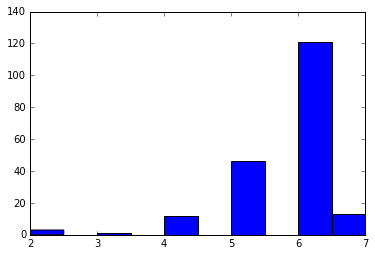

0.270408163265
+NN 0.658163265306
     Labels LastTrainingsDate PredictionDay ValidationDay  PrizeAtPrediction  \
195  BEI.DE        2018-03-06    2018-03-09    2018-03-14              89.78   

     PrizeAtValidation  RelativePrizeChange  TrueCategory PredictedCategory  \
195                NaN                  NaN             2                 4   

                                PredictedProbabilities  PredictedUpperPrize  \
195  [2.0, 2.0, 1.0, 3.0, 34.0, 14.0, 20.0, 8.0, 7....                88.88   

     PredictedLowerPrize ModelType  \
195                87.98       RFC   

                                  ModelParameters         Timestamp Duration  
195  {u'max_features': u'auto', u'max_depth': 75}  2018-03-15 15:53        3   196


In [157]:

data = pd.read_pickle('/localscratch/data/project_one/data/predictions/stocks/full_predictions_3BT.p')
print data.tail(2)
data = data.loc[(data['Labels'] == 'BEI.DE') & (data['ModelType'] == 'RFC')]

plt.hist(data['PredictedCategory'])
plt.show()
print np.sum((data['TrueCategory'] == data['PredictedCategory'])*1.0)/len(data)
print "+NN",np.sum((np.abs(data['TrueCategory']- data['PredictedCategory']) <=1)*1.0)/len(data)



data.reset_index(drop=True,inplace=True)
print data.tail(1),len(data)

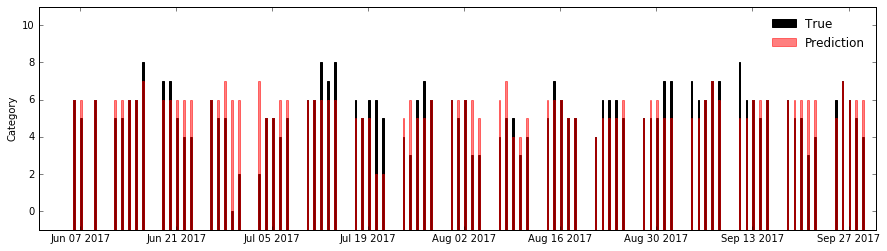

In [155]:
plt.figure(figsize=(15,4))
for k in range(len(data)):
    if k == len(data)-1:
        x,y=data['ValidationDay'].values[k],data['TrueCategory'].values[k]
        
        plt.bar(x,height=y+1,bottom=-1,width=0.25,edgecolor='k',label=r'True',facecolor='k')
        y2=data['PredictedCategory'].values[k]
        plt.bar(x,height=y2+1,bottom=-1,width=0.25,edgecolor='r',alpha=0.5,label=r'Prediction',facecolor='r')

    else:
        x,y=data['ValidationDay'].values[k],data['TrueCategory'].values[k]
        plt.bar(x,height=y+1,bottom=-1,width=0.25,edgecolor='k',facecolor='k')
        y2=data['PredictedCategory'].values[k]
        plt.bar(x,height=y2+1,bottom=-1,width=0.25,edgecolor='r',facecolor='r',alpha=0.5)
    
        
plt.xlim(data['ValidationDay'].values[0],data['ValidationDay'].values[k])
plt.xlim(dt(2017,6,1),dt(2017,10,1))
plt.ylabel(r'Category')
plt.ylim(-1,11)
plt.legend(loc='upper right',frameon=False)
#plt.plot(data['ValidationDay'],data['TrueCategory'])

plt.show()

12 12


SystemExit: 

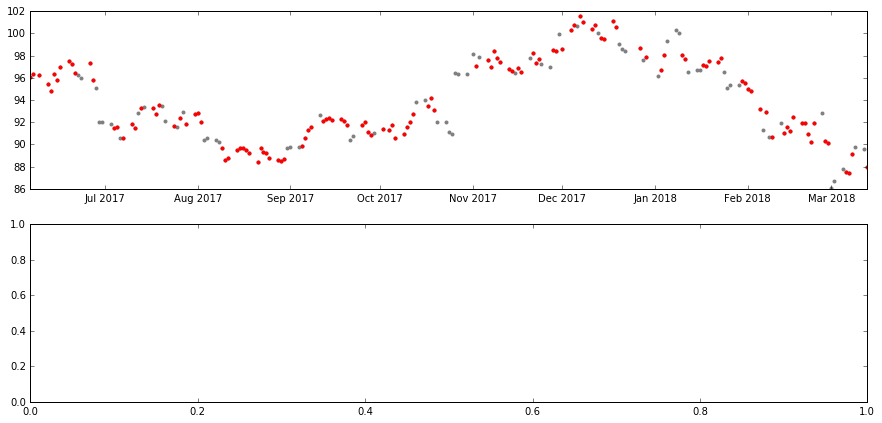

In [156]:
fig,ax= plt.subplots(2,1,figsize=(15,7))
lower =np.array([-50,-5,-2.5,0,2.5,5])*0.01
upper = np.array([-5,-2.5,0,2.5,5,100])*0.01

lower = np.array([-50,-5,-4,-3,-2,-1,0,1,2,3,4,5])*0.01
upper = np.array([-5,-4,-3,-2,1,0,1,2,3,4,5,100])*0.01
print len(lower),len(upper)
tmp = data['PrizeAtPrediction'].values
cat = np.array(data['PredictedCategory'].values,dtype=int)
true_prize = data['PrizeAtValidation']
true_cat = data['TrueCategory']
pred_cat = data['PredictedCategory']


#print tmp[0],tmp[0]*(1+lower[cat[0]]),tmp[0]*(1+upper[cat[0]]), 


upp = (tmp*(1.+upper[cat]))
low = (tmp*(1.+lower[cat]))

dates = data['ValidationDay'].values
ax[0].plot_date(dates,true_prize.values,'o',color='gray',markeredgecolor="none",markersize=4,label=r'True price')

ax[0].plot_date(dates[true_cat == pred_cat],true_prize[true_cat == pred_cat],'ro',markersize=4,markeredgecolor="none")
ax[0].plot_date(dates[np.abs(true_cat-pred_cat) == 1.0],true_prize[np.abs(true_cat-pred_cat) == 1.0],'o',color='r',markersize=4,markeredgecolor="none")

sys.exit()

for i in range(len(data)):
    if (true_prize[i]) > low[i] and (true_prize[i]<upp[i]):
        ax[0].bar(dates[i],height=upp[i]-low[i],bottom=low[i],width=0.4,color='r',edgecolor="r",alpha=0.5)
        
    elif np.abs(true_cat[i] - pred_cat[i]) == 1:
        ax[0].bar(dates[i],height=upp[i]-low[i],bottom=low[i],width=0.4,color='royalblue',edgecolor="royalblue",alpha=0.5)
    else:
        ax[0].bar(dates[i],height=upp[i]-low[i],bottom=low[i],width=0.4,color='gray',edgecolor="gray")

        
ax[0].legend(loc='lower right',frameon=False,numpoints=1)
ax[0].set_ylabel(r'Closing price')


prob = data['PredictedProbabilities']

pmax = [np.max(p) for p in prob]
ax[1].axhline(50,color='k',ls='--')

for i in range(len(data)):
    if (true_prize.values[i]) > low[i] and (true_prize.values[i]<upp[i]):
        ax[1].bar(data['ValidationDay'][i],pmax[i],width=0.25,color='r',edgecolor='r')
        
    elif np.abs(true_cat[i] - pred_cat[i]) == 1:
        ax[1].bar(data['ValidationDay'].values[i],pmax[i],width=0.25,color='royalblue',edgecolor='royalblue')
    else:
        ax[1].bar(data['ValidationDay'].values[i],pmax[i],width=0.25,color='gray',edgecolor='gray')


ax[1].set_ylabel(r'Model probability')
ax[0].set_ylim(75,90)
ax[1].set_ylim(0,50)

ax[0].set_xlim(dt(2017,6,1),dt(2018,1,1))
ax[1].set_xlim(dt(2017,6,1),dt(2018,1,1))
ax[0].get_xaxis().set_visible(False)

fig.subplots_adjust(hspace=0.02)

#plt.savefig('/localscratch/data/project_one/figs/ALV.pdf')
plt.show()



In [27]:
_true = np.bitwise_and(true_prize.values>low,true_prize<upp)


N = np.arange(0.4,0.9,0.1)

correct = np.zeros([len(N),3])

for k,n in enumerate(N):
    
    _prob = np.where(np.array(pmax)>n)[0]
    correct[k,0] = n*100.
    correct[k,1] = np.sum(_true[_prob]*1.0)/len(_prob)*100.00
    correct[k,2] = len(_prob)

plt.bar(correct[:,0]-3,height=correct[:,1],width=6,edgecolor="white",facecolor='r',alpha=0.5)

plt.xlim(35,85)
plt.ylim(50,90)
plt.ylabel(r'Probability for correct prediction (%)')
plt.xlabel(r'Model prediction > x%')

plt.draw()
#plt.savefig('/localscratch/data/project_one/figs/ALV_prob.pdf')

plt.show()

print correct

880      True
881     False
882      True
883     False
884     False
885      True
886      True
887      True
888      True
889      True
890     False
891     False
892     False
893      True
894     False
895     False
896     False
897     False
898     False
899      True
900     False
901     False
902      True
903     False
904     False
905     False
906      True
907      True
908      True
909      True
        ...  
1026    False
1027    False
1028    False
1029     True
1030     True
1031    False
1032    False
1033    False
1034     True
1035    False
1036    False
1037    False
1038    False
1039     True
1040     True
1041    False
1042    False
1043    False
1044     True
1045     True
1046     True
1047     True
1048    False
1049    False
1050     True
1051    False
1052    False
1053    False
1054     True
1055     True
Name: PrizeAtValidation, Length: 176, dtype: bool


KeyError: u'None of [[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17\n  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35\n  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53\n  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71\n  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89\n  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107\n 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125\n 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143\n 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161\n 162 163 164 165 166 167 168 169 170 171 172 173 174 175]] are in the [index]'

171.449997 171.449997 175.736246925

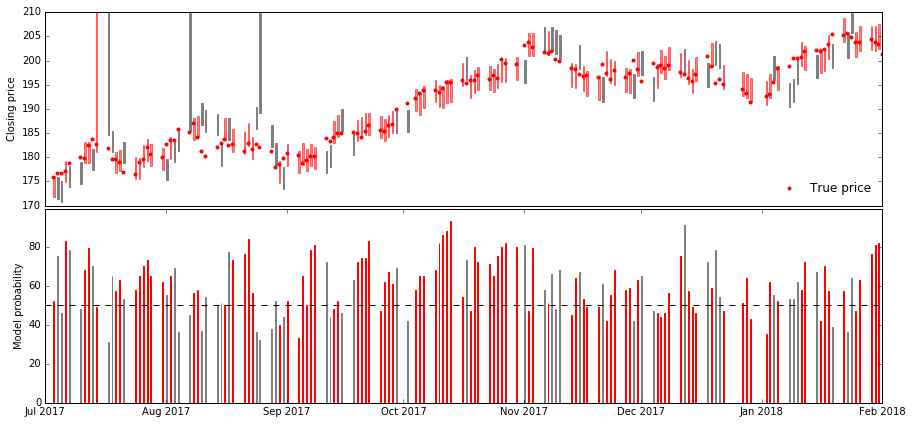

In [4]:
fig,ax= plt.subplots(2,1,figsize=(15,7))
lower =np.array([-50,-5,-2.5,0,2.5,5])*0.01
upper = np.array([-5,-2.5,0,2.5,5,100])*0.01

tmp = data['PrizeAtPrediction'].values
cat = np.array(data['PredictedCategory'].values,dtype=int)
true_prize = data['PrizeAtValidaion']
print tmp[0],tmp[0]*(1+lower[cat[0]]),tmp[0]*(1+upper[cat[0]]), 


upp = (tmp*(1.+upper[cat]))
low = (tmp*(1.+lower[cat]))
dates = data['ValidationDay'].values
ax[0].plot_date(dates,true_prize.values,'ro',markeredgecolor="none",markersize=4,label=r'True price')
for i in range(len(data)):
    if (true_prize.values[i]) > low[i] and (true_prize.values[i]<upp[i]):
        ax[0].bar(dates[i],height=upp[i]-low[i],bottom=low[i],width=0.4,color='r',edgecolor="r",alpha=0.5)
    else:
        ax[0].bar(dates[i],height=upp[i]-low[i],bottom=low[i],width=0.4,color='gray',edgecolor="gray")

        
ax[0].legend(loc='lower right',frameon=False,numpoints=1)
ax[0].set_ylabel(r'Closing price')
prob = data['PredictedProbabilities']

pmax = [np.max(p) for p in prob]
ax[1].axhline(50,color='k',ls='--')

for i in range(len(data)):
    if (true_prize.values[i]) > low[i] and (true_prize.values[i]<upp[i]):
        ax[1].bar(data['ValidationDay'].values[i],pmax[i]*100,width=0.25,color='r',edgecolor='r')
    else:
        ax[1].bar(data['ValidationDay'].values[i],pmax[i]*100,width=0.25,color='gray',edgecolor='gray')


ax[1].set_ylabel(r'Model probability')
ax[0].set_ylim(170,210)
ax[1].set_ylim(0,99)

ax[0].set_xlim(dt.datetime(2017,7,1),dt.datetime(2018,2,1))
ax[1].set_xlim(dt.datetime(2017,7,1),dt.datetime(2018,2,1))
ax[0].get_xaxis().set_visible(False)

fig.subplots_adjust(hspace=0.02)

#plt.savefig('/localscratch/data/project_one/figs/ALV.pdf')
plt.show()

In [20]:
_true = np.bitwise_and(true_prize.values>low,true_prize<upp)

N = np.arange(0.4,0.9,0.1)

correct = np.zeros([len(N),3])

for k,n in enumerate(N):
    
    _prob = np.where(np.array(pmax)>n)[0]
    correct[k,0] = n*100.
    correct[k,1] = np.sum(_true[_prob]*1.0)/len(_prob)*100.00
    correct[k,2] = len(_prob)

plt.bar(correct[:,0]-3,height=correct[:,1],width=6,edgecolor="white",facecolor='r',alpha=0.5)

plt.xlim(35,85)
plt.ylim(50,90)
plt.ylabel(r'Probability for correct prediction (%)')
plt.xlabel(r'Model prediction > x%')

plt.draw()
#plt.savefig('/localscratch/data/project_one/figs/ALV_prob.pdf')

plt.show()

print correct

KeyError: u'None of [[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17\n  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35\n  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53\n  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71\n  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89\n  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107\n 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125\n 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143\n 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161\n 162 163 164 165 166 167 168 169 170 171 172 173 174 175]] are in the [index]'